In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Activation
from keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

## 1.Tỉ lệ 8:2

### a.Dữ liệu giá vàng

#### Đọc dữ liệu và chia tập dữ liệu

In [21]:
df_gold = pd.read_csv('/kaggle/input/metal-dataset/gold_price_2018_2024.csv')
df_gold

,Date,Value (USD per troy ounce)
0,2018-01-01,1307.018690
1,2018-01-02,1319.827953
2,2018-01-03,1311.501862
3,2018-01-04,1321.635371
4,2018-01-05,1319.589185
...,...,...
2339,2024-05-28,2353.805161
2340,2024-05-29,2357.459733
2341,2024-05-30,2335.806797
2342,2024-05-31,2346.815711


In [22]:
df_gold.columns = ['Date', 'Price']
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Price'] = df_gold.Price.astype(float)

df1 = df_gold.reset_index()['Price']

df1

0       1307.018690
1       1319.827953
2       1311.501862
3       1321.635371
4       1319.589185
           ...     
2339    2353.805161
2340    2357.459733
2341    2335.806797
2342    2346.815711
2343    2327.903344
Name: Price, Length: 2344, dtype: float64

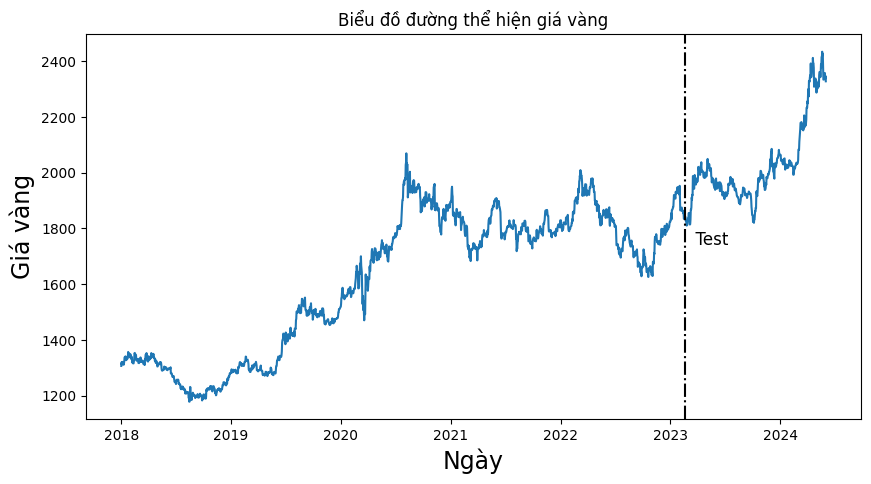

In [23]:
x_plot = df_gold.Date
y_plot = df1.values
x_test_position = int(len(df_gold)*0.8)
x_value = df_gold.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá vàng')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá vàng', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 100, '  Test', fontsize=12)

plt.show()
plt.close()

In [24]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [25]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (1875, 1)
Test data size: (469, 1)


In [26]:
# Biến đổi mảng giá trị thành một bộ dữ liệu dạng ma trận
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [27]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (1774, 100, 1)
Test data size shape: (368, 100, 1)


#### Tạo mô hình và train

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [30]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - loss: 0.0828 - val_loss: 0.0022
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - loss: 9.5843e-04 - val_loss: 0.0018
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 8.1169e-04 - val_loss: 0.0017
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - loss: 7.7169e-04 - val_loss: 0.0020
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 7.3127e-04 - val_loss: 0.0018
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - loss: 6.4251e-04 - val_loss: 0.0021
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - loss: 7.1379e-04 - val_loss: 0.0027
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - loss: 6.3344e-04 - val_loss: 0.0025
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - loss: 6.6909e-04 - val_loss: 0.0020
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - loss: 6.6548e-04 - val_loss: 0.0016
Epo

#### Dự báo và trực quan hoá

In [31]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step


In [32]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [33]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 22.611670872863655
Testing MAPE: 0.7281650558065195
Testing MAE: 15.603016392675103


In [34]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[len(X_test):].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


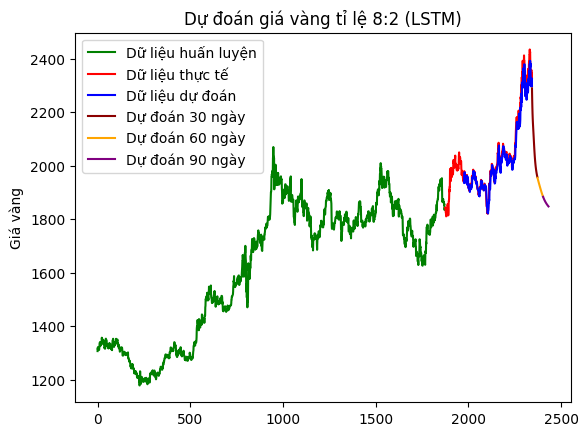

In [35]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá vàng tỉ lệ 8:2 (LSTM)')
plt.ylabel('Giá vàng')
plt.show()

### b.Dữ liệu giá bạc

#### Đọc dữ liệu và chia tập dữ liệu

In [36]:
df_silver = pd.read_csv('/kaggle/input/metal-dataset/silver_price_2018_2024.csv')
df_silver

,Date,Value (USD per troy ounce)
0,2018-01-01,16.993771
1,2018-01-02,17.196475
2,2018-01-03,17.112426
3,2018-01-04,17.200338
4,2018-01-05,17.220985
...,...,...
2339,2024-05-28,31.790544
2340,2024-05-29,31.992130
2341,2024-05-30,31.825860
2342,2024-05-31,31.137894


In [37]:
df_silver.columns = ['Date', 'Price']
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Price'] = df_silver.Price.astype(float)

df1 = df_silver.reset_index()['Price']

df1

0       16.993771
1       17.196475
2       17.112426
3       17.200338
4       17.220985
          ...    
2339    31.790544
2340    31.992130
2341    31.825860
2342    31.137894
2343    30.408189
Name: Price, Length: 2344, dtype: float64

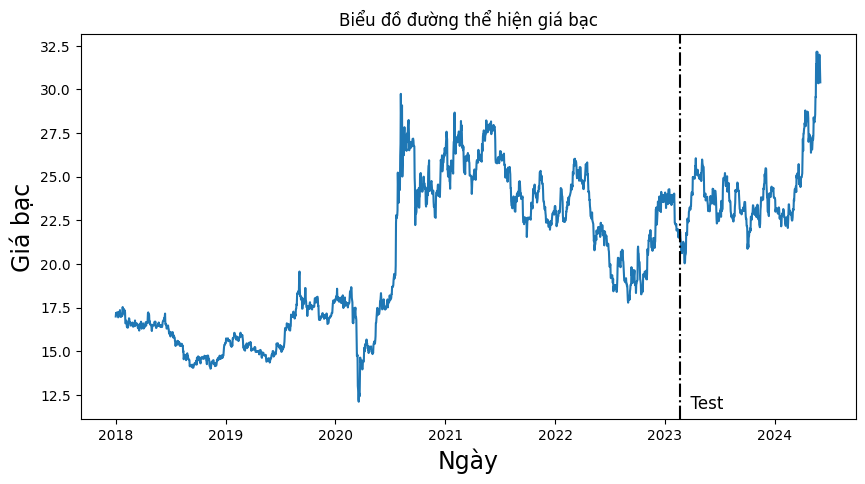

In [38]:
x_plot = df_silver.Date
y_plot = df1.values
x_test_position = int(len(df_silver)*0.8)
x_value = df_silver.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá bạc')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá bạc', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 10, '  Test', fontsize=12)

plt.show()
plt.close()

In [39]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [40]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (1875, 1)
Test data size: (469, 1)


In [41]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [42]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (1774, 100, 1)
Test data size shape: (368, 100, 1)


#### Tạo mô hình và train

In [43]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [44]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 231ms/step - loss: 0.0493 - val_loss: 0.0048
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━

#### Dự báo và trực quan hoá

In [45]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


In [46]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [47]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 0.41310239293204964
Testing MAPE: 1.0975328686509622
Testing MAE: 0.27568165919164356


In [48]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[len(X_test):].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


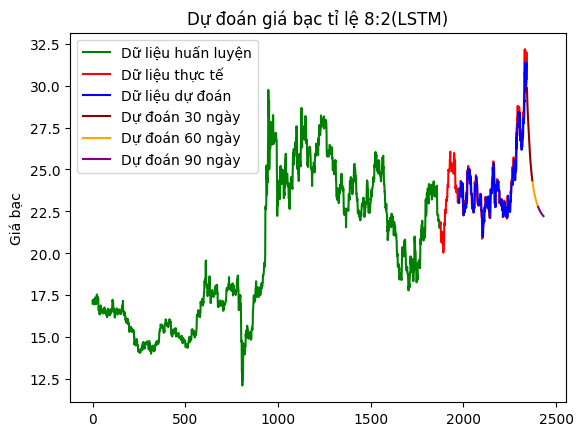

In [49]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá bạc tỉ lệ 8:2(LSTM)')
plt.ylabel('Giá bạc')
plt.show()

### c.Dữ liệu giá bạch kim

#### Đọc dữ liệu và chia tập dữ liệu

In [50]:
df_platium = pd.read_csv('/kaggle/input/metal-dataset/platium_price_2018_2024.csv')
df_platium

,Date,Value (USD per troy ounce)
0,2018-01-01,930.030587
1,2018-01-02,944.375754
2,2018-01-03,954.910273
3,2018-01-04,960.864535
4,2018-01-05,969.196081
...,...,...
2339,2024-05-28,1062.333141
2340,2024-05-29,1063.887962
2341,2024-05-30,1036.777827
2342,2024-05-31,1027.966127


In [51]:
df_platium.columns = ['Date', 'Price']
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium['Price'] = df_platium.Price.astype(float)

df1 = df_platium.reset_index()['Price']

df1

0        930.030587
1        944.375754
2        954.910273
3        960.864535
4        969.196081
           ...     
2339    1062.333141
2340    1063.887962
2341    1036.777827
2342    1027.966127
2343    1009.071350
Name: Price, Length: 2344, dtype: float64

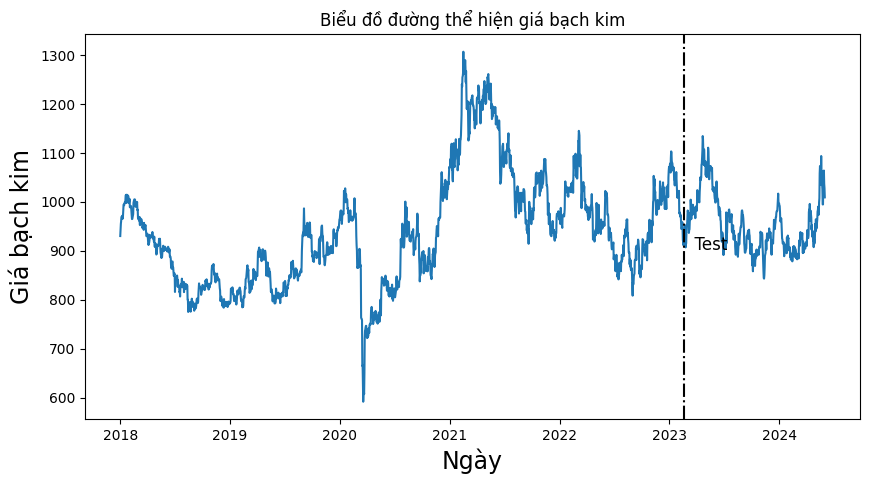

In [52]:
x_plot = df_platium.Date
y_plot = df1.values
x_test_position = int(len(df_platium)*0.8)
x_value = df_platium.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá bạch kim')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá bạch kim', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 10, '  Test', fontsize=12)

plt.show()
plt.close()

In [53]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [54]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (1875, 1)
Test data size: (469, 1)


In [55]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [56]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (1774, 100, 1)
Test data size shape: (368, 100, 1)


#### Tạo mô hình và train

In [57]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [58]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 0.0610 - val_loss: 0.0026
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - loss: 0.0050 - val_loss: 0.0033
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━

#### Dự báo và trực quan hoá

In [59]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step


In [60]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [61]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 14.48148124310928
Testing MAPE: 1.1129987708051214
Testing MAE: 10.49015120435479


In [62]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[len(X_test):].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


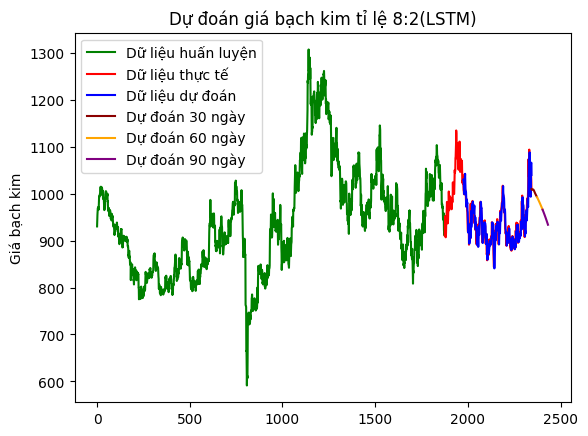

In [63]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá bạch kim tỉ lệ 8:2(LSTM)')
plt.ylabel('Giá bạch kim')
plt.show()

## 1.Tỉ lệ 9:1

### a.Dữ liệu giá vàng

#### Đọc dữ liệu và chia tập dữ liệu

In [64]:
df_gold.columns = ['Date', 'Price']
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Price'] = df_gold.Price.astype(float)

df1 = df_gold.reset_index()['Price']

df1

0       1307.018690
1       1319.827953
2       1311.501862
3       1321.635371
4       1319.589185
           ...     
2339    2353.805161
2340    2357.459733
2341    2335.806797
2342    2346.815711
2343    2327.903344
Name: Price, Length: 2344, dtype: float64

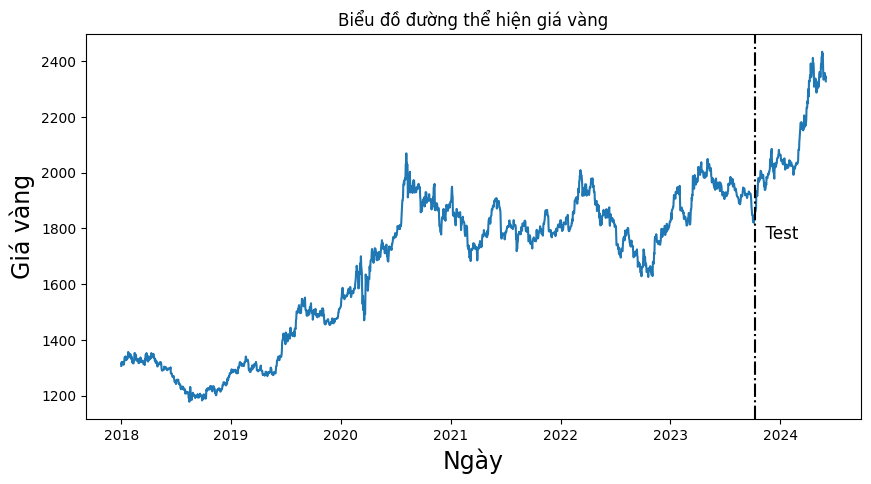

In [65]:
x_plot = df_gold.Date
y_plot = df1.values
x_test_position = int(len(df_gold)*0.9)
x_value = df_gold.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá vàng')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá vàng', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 100, '  Test', fontsize=12)

plt.show()
plt.close()

In [66]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [67]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (2109, 1)
Test data size: (235, 1)


In [68]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [69]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (2008, 100, 1)
Test data size shape: (134, 100, 1)


#### Tạo mô hình và train

In [70]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [71]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - loss: 0.0520 - val_loss: 0.0300
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - loss: 0.0020 - val_loss: 0.0058
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - loss: 8.4836e-04 - val_loss: 0.0060
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - loss: 8.2190e-04 - val_loss: 0.0057
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - loss: 7.5043e-04 - val_loss: 0.0043
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - loss: 7.7576e-04 - val_loss: 0.0047
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - loss: 8.1642e-04 - val_loss: 0.0039
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - loss: 7.5777e-04 - val_loss: 0.0062
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - loss: 7.0908e-04 - val_loss: 0.0057
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - loss: 6.1660e-04 - val_loss: 0.0036
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - loss: 6.3833e-04 - val_loss: 0.0055
Ep

#### Dự báo và trực quan hoá

In [72]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step


In [73]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [74]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 20.90768336010054
Testing MAPE: 0.6564801668283935
Testing MAE: 14.840206280253636


In [75]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[len(X_test):].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


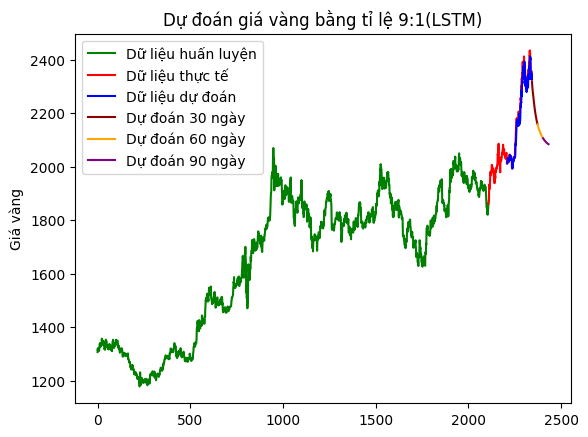

In [76]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá vàng bằng tỉ lệ 9:1(LSTM)')
plt.ylabel('Giá vàng')
plt.show()

### b.Dữ liệu giá bạc

#### Đọc dữ liệu và chia tập dữ liệu

In [77]:
df_silver.columns = ['Date', 'Price']
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Price'] = df_silver.Price.astype(float)

df1 = df_silver.reset_index()['Price']

df1

0       16.993771
1       17.196475
2       17.112426
3       17.200338
4       17.220985
          ...    
2339    31.790544
2340    31.992130
2341    31.825860
2342    31.137894
2343    30.408189
Name: Price, Length: 2344, dtype: float64

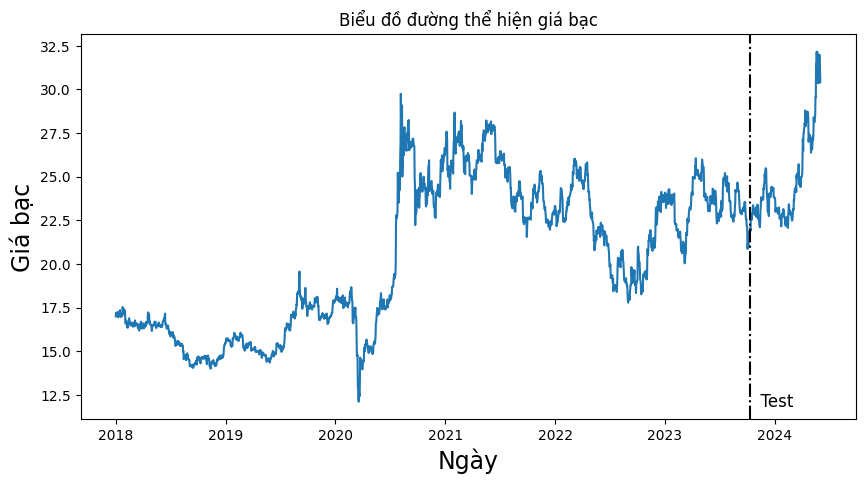

In [78]:
x_plot = df_silver.Date
y_plot = df1.values
x_test_position = int(len(df_silver)*0.9)
x_value = df_silver.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá bạc')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá bạc', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 10, '  Test', fontsize=12)

plt.show()
plt.close()

In [79]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [80]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (2109, 1)
Test data size: (235, 1)


In [81]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [82]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (2008, 100, 1)
Test data size shape: (134, 100, 1)


#### Tạo mô hình và train

In [83]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [84]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - loss: 0.0517 - val_loss: 0.0211
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - loss: 0.0024 - val_loss: 0.0067
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - loss: 0.0021 - val_loss: 0.0041
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 0.0017 - val_loss: 0.0037
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━

#### Dự báo và trực quan hoá

In [85]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step


In [86]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [87]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 0.583690898568588
Testing MAPE: 1.5286558676683701
Testing MAE: 0.41425353124246606


In [88]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[len(X_test):].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


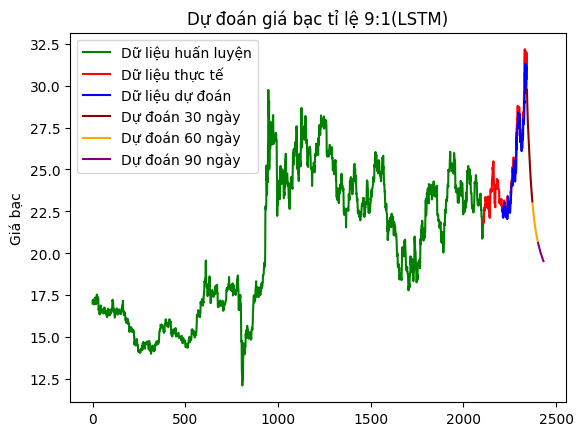

In [89]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá bạc tỉ lệ 9:1(LSTM)')
plt.ylabel('Giá bạc')
plt.show()

### c.Dữ liệu giá bạch kim

#### Đọc dữ liệu và chia tập dữ liệu

In [90]:
df_platium.columns = ['Date', 'Price']
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium['Price'] = df_platium.Price.astype(float)

df1 = df_platium.reset_index()['Price']

df1

0        930.030587
1        944.375754
2        954.910273
3        960.864535
4        969.196081
           ...     
2339    1062.333141
2340    1063.887962
2341    1036.777827
2342    1027.966127
2343    1009.071350
Name: Price, Length: 2344, dtype: float64

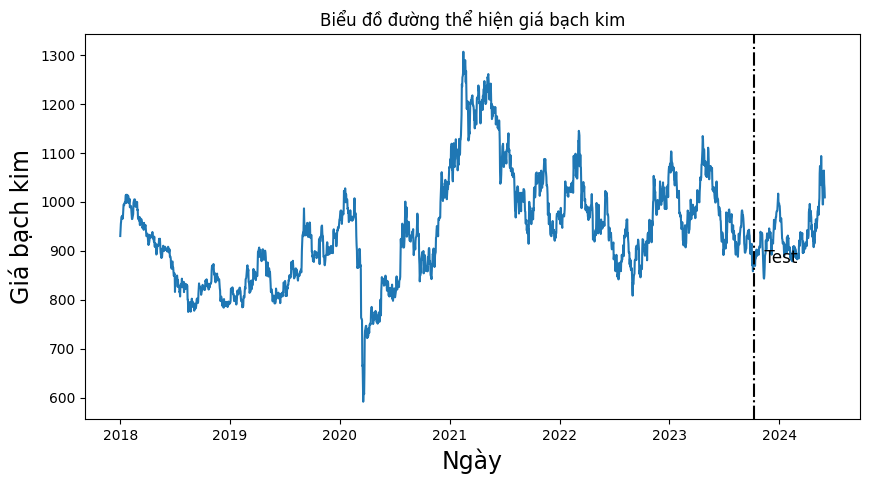

In [91]:
x_plot = df_platium.Date
y_plot = df1.values
x_test_position = int(len(df_platium)*0.9)
x_value = df_platium.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá bạch kim')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá bạch kim', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 10, '  Test', fontsize=12)

plt.show()
plt.close()

In [92]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [93]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (2109, 1)
Test data size: (235, 1)


In [94]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [95]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (2008, 100, 1)
Test data size shape: (134, 100, 1)


#### Tạo mô hình và train

In [96]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [97]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - loss: 0.0813 - val_loss: 0.0037
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - loss: 0.0052 - val_loss: 0.0022
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━

#### Dự báo và trực quan hoá

In [98]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step


In [99]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [100]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 16.87912695562349
Testing MAPE: 1.271570031566659
Testing MAE: 12.187902667802149


In [101]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[len(X_test):].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


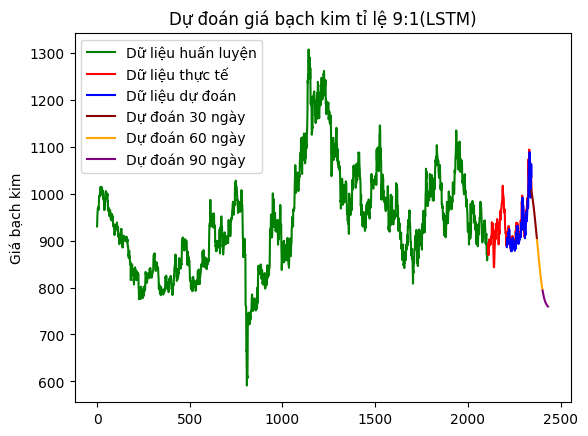

In [102]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá bạch kim tỉ lệ 9:1(LSTM)')
plt.ylabel('Giá bạch kim')
plt.show()

## 1.Tỉ lệ 7:3

### a.Dữ liệu giá vàng

#### Đọc dữ liệu và chia tập dữ liệu

In [103]:
df_gold.columns = ['Date', 'Price']
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Price'] = df_gold.Price.astype(float)

df1 = df_gold.reset_index()['Price']

df1

0       1307.018690
1       1319.827953
2       1311.501862
3       1321.635371
4       1319.589185
           ...     
2339    2353.805161
2340    2357.459733
2341    2335.806797
2342    2346.815711
2343    2327.903344
Name: Price, Length: 2344, dtype: float64

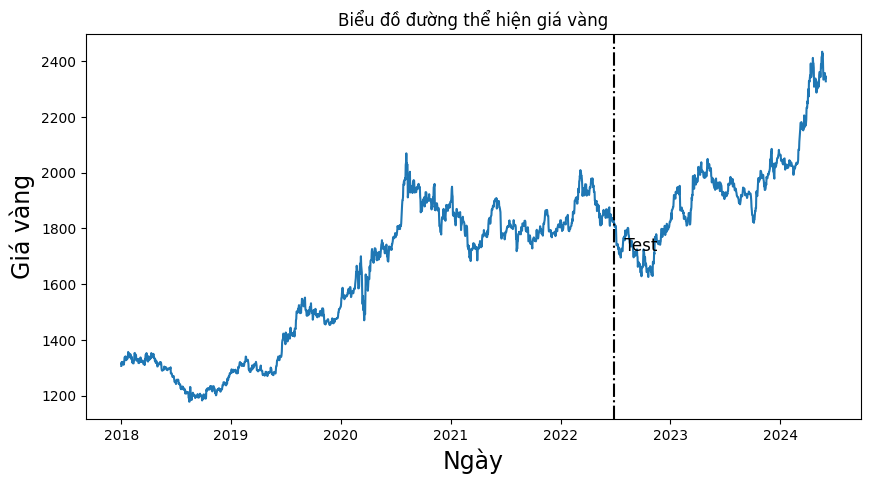

In [104]:
x_plot = df_gold.Date
y_plot = df1.values
x_test_position = int(len(df_gold)*0.7)
x_value = df_gold.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá vàng')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá vàng', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 100, '  Test', fontsize=12)

plt.show()
plt.close()

In [105]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [106]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (1640, 1)
Test data size: (704, 1)


In [107]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [108]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (1539, 100, 1)
Test data size shape: (603, 100, 1)


#### Tạo mô hình và train

In [109]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [110]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - loss: 0.0627 - val_loss: 0.0021
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - loss: 9.8540e-04 - val_loss: 0.0015
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 7.1969e-04 - val_loss: 0.0018
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - loss: 7.6100e-04 - val_loss: 0.0018
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 7.1912e-04 - val_loss: 0.0013
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 8.6869e-04 - val_loss: 0.0014
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 6.4613e-04 - val_loss: 0.0018
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 6.9248e-04 - val_loss: 0.0020
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 6.7080e-04 - val_loss: 0.0022
Epoch 12

#### Dự báo và trực quan hoá

In [111]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step


In [112]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [113]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 23.112191536916054
Testing MAPE: 0.7917749117847644
Testing MAE: 16.268266110042884


In [114]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[len(X_test):].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


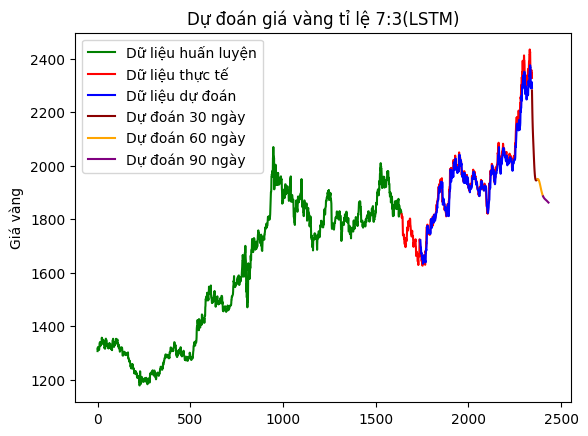

In [115]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá vàng tỉ lệ 7:3(LSTM)')
plt.ylabel('Giá vàng')
plt.show()

### b.Dữ liệu giá bạc

#### Đọc dữ liệu và chia tập dữ liệu

In [116]:
df_silver.columns = ['Date', 'Price']
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Price'] = df_silver.Price.astype(float)

df1 = df_silver.reset_index()['Price']

df1

0       16.993771
1       17.196475
2       17.112426
3       17.200338
4       17.220985
          ...    
2339    31.790544
2340    31.992130
2341    31.825860
2342    31.137894
2343    30.408189
Name: Price, Length: 2344, dtype: float64

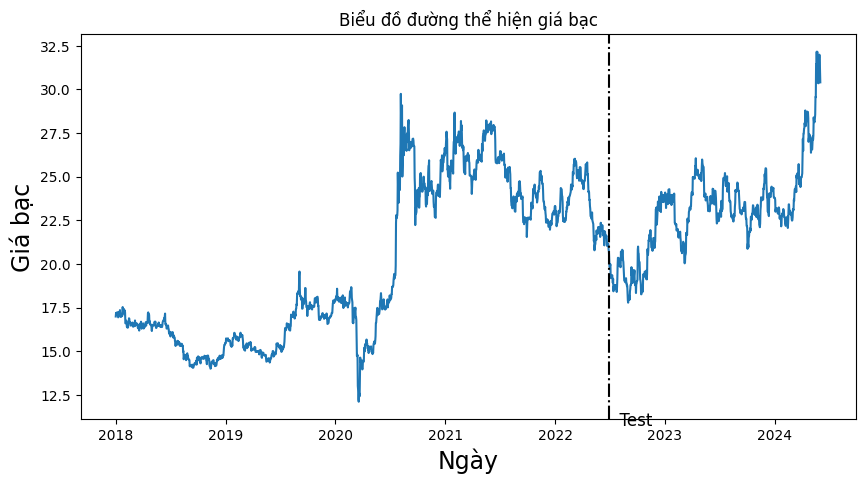

In [117]:
x_plot = df_silver.Date
y_plot = df1.values
x_test_position = int(len(df_silver)*0.7)
x_value = df_silver.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá bạc')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá bạc', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 10, '  Test', fontsize=12)

plt.show()
plt.close()

In [118]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [119]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (1640, 1)
Test data size: (704, 1)


In [120]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [121]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (1539, 100, 1)
Test data size shape: (603, 100, 1)


#### Tạo mô hình và train

In [122]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [123]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - loss: 0.0773 - val_loss: 0.0058
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 

#### Dự báo và trực quan hoá

In [124]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


In [125]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [126]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 0.4238206894290159
Testing MAPE: 1.4036670989719087
Testing MAE: 0.3299231533308915


In [127]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[len(X_test):].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


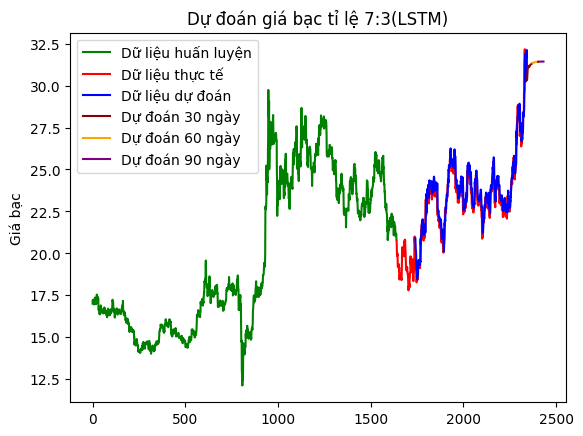

In [128]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá bạc tỉ lệ 7:3(LSTM)')
plt.ylabel('Giá bạc')
plt.show()

### c.Dữ liệu giá bạch kim

#### Đọc dữ liệu và chia tập dữ liệu

In [129]:
df_platium.columns = ['Date', 'Price']
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium['Price'] = df_platium.Price.astype(float)

df1 = df_platium.reset_index()['Price']

df1

0        930.030587
1        944.375754
2        954.910273
3        960.864535
4        969.196081
           ...     
2339    1062.333141
2340    1063.887962
2341    1036.777827
2342    1027.966127
2343    1009.071350
Name: Price, Length: 2344, dtype: float64

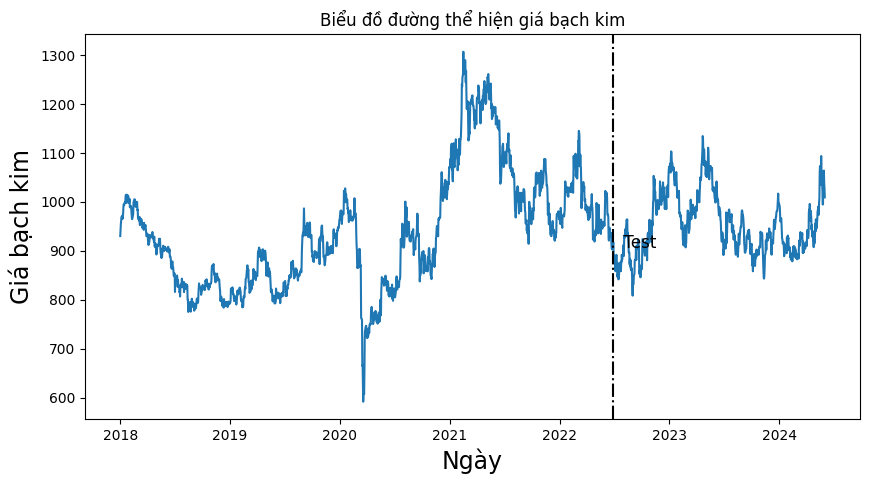

In [130]:
x_plot = df_platium.Date
y_plot = df1.values
x_test_position = int(len(df_platium)*0.7)
x_value = df_platium.Date.iloc[x_test_position]
fig = plt.figure(figsize=(10, 5))

fig.tight_layout()

plt.plot(x_plot, y_plot)
plt.title('Biểu đồ đường thể hiện giá bạch kim')
plt.xlabel('Ngày', fontsize=17)
plt.ylabel('Giá bạch kim', fontsize=17)

plt.axvline(x_value, color='black', linestyle='-.')
plt.text(x_value, y_plot[x_test_position] - 10, '  Test', fontsize=12)

plt.show()
plt.close()

In [131]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [132]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

print('Train data size:', train_data.shape)
print('Test data size:', test_data.shape)

Train data size: (1640, 1)
Test data size: (704, 1)


In [133]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [134]:
# Reshape lại dữ liệu vì đây là yêu cầu cần thiết đối với đầu vào của LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print('Train data size shape:', X_train.shape)
print('Test data size shape:', X_test.shape)

Train data size shape: (1539, 100, 1)
Test data size shape: (603, 100, 1)


#### Tạo mô hình và train

In [135]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [136]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - loss: 0.0732 - val_loss: 0.0067
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - loss: 0.0060 - val_loss: 0.0025
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 

#### Dự báo và trực quan hoá

In [137]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step


In [138]:
# Chuẩn hóa dữ liệu y_pred, y_test
y_pred = scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [139]:
# Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 15.41644214617446
Testing MAPE: 1.169530741747105
Testing MAE: 11.30754561533636


In [140]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[len(X_test):].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=100
i=0

while(i<90):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


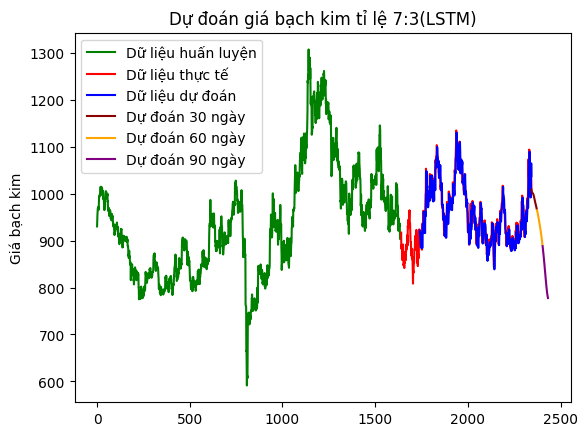

In [141]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data), color='green')
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data), color='red')

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred), color='blue')

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]), color='darkred')
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]), color='orange')
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]), color='purple')

plt.legend(['Dữ liệu huấn luyện','Dữ liệu thực tế','Dữ liệu dự đoán','Dự đoán 30 ngày', 'Dự đoán 60 ngày', 'Dự đoán 90 ngày'])
plt.title('Dự đoán giá bạch kim tỉ lệ 7:3(LSTM)')
plt.ylabel('Giá bạch kim')
plt.show()